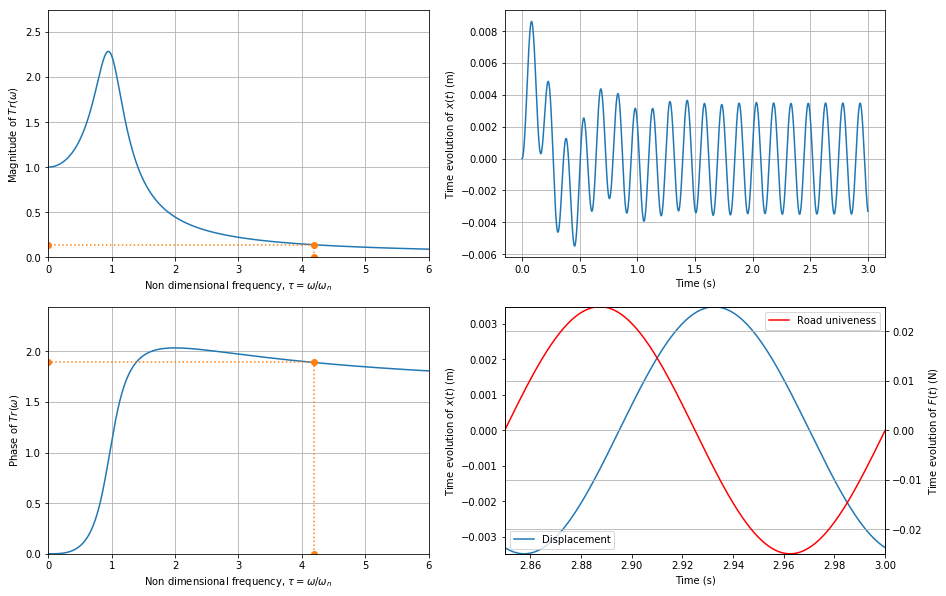

In [34]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

x0 = 0.0
x0p = 0.0

m = 250.0
c = 1250.0
k = 25000.0

Y = 0.025

v = 120.0*1000.0/3600.0 # en m/s
lbd = 5. # wave length of road univeness
w = 2*np.pi*v/lbd

wn = np.sqrt(k/m)
xi = c/(2*m*wn)
wd = wn*np.sqrt(1-xi**2)
tau = w/wn

NP = 5000
t = np.linspace(0,6,NP,endpoint = True)
Tr = np.sqrt(1 + (2*xi*t)**2)/np.sqrt((1-t**2)**2 + (2*xi*t)**2)
NC = 20 # number of cicles to show
tf = NC*2*np.pi/w
time = np.linspace(0,tf,NP,endpoint = True)

plt.rcParams['figure.figsize'] = 15, 10

plt.subplot(2,2,1)
plt.plot(t,Tr)
Tr1 = np.sqrt(1 + (2*xi*tau)**2)/np.sqrt((1-tau**2)**2 + (2*xi*tau)**2)
plt.plot([tau,tau,0],[0,Tr1,Tr1],':o')
plt.ylabel(r'Magnitude of $Tr(\omega)$')
plt.xlabel(r'Non dimensional frequency, $\tau=\omega/\omega_n$')
plt.xlim((t.min(),t.max()))
plt.ylim((0,1.2*Tr.max()))
plt.grid(True)
plt.subplot(2,2,2)

alfa = np.arctan2(2*xi*tau*tau*tau,1-tau*tau + (2*xi*tau)**2)
        
xP0 = Tr1*Y*np.sin(w*0-alfa)
xP0p = Tr1*Y*w*np.cos(w*0-alfa)
x = np.exp(-xi*wn*time)*(x0*np.cos(wd*time)+(x0p+xi*wn*x0)*np.sin(wd*time)/wd)-np.exp(-xi*wn*time)*(xP0*np.cos(wd*time)+(xP0p+xi*wn*xP0)*np.sin(wd*time)/wd)+Tr1*Y*np.sin(w*time-alfa)

plt.plot(time,x)
plt.ylabel(r'Time evolution of $x(t)$ (m)')
plt.xlabel(r'Time (s)')
plt.grid(True)

plt.subplot(2,2,3)
Tr_phase = np.arctan2(2*xi*t*t*t,1-t*t + (2*xi*t)**2)
plt.plot(t,Tr_phase)
plt.plot([tau,tau,0],[0,alfa,alfa],':o')
plt.grid(True)
plt.ylabel(r'Phase of $Tr(\omega)$')
plt.xlabel(r'Non dimensional frequency, $\tau=\omega/\omega_n$')
plt.xlim((t.min(),t.max()))
plt.ylim((0,1.2*Tr_phase.max()))

ax1 = plt.subplot(2,2,4)
f = Y*np.sin(w*time)
ax1.plot(time,x,label='Displacement')
plt.ylabel(r'Time evolution of $x(t)$ (m)')
plt.xlabel(r'Time (s)')
plt.legend(loc='lower left')
plt.ylim((-Tr1*Y,Tr1*Y))
ax2 = ax1.twinx()
ax2.plot(time,f,'r',label='Road univeness')
plt.xlim((tf-2*np.pi/w,tf))
plt.grid(True)
plt.legend(loc='upper right')
plt.ylabel(r'Time evolution of $F(t)$ (N)')
plt.ylim((-Y,Y));